## 평균이동은 대역폭(원)을 가지고 확률밀도함수(probability density function)이용해 군집중심점 찾음
* 함수찾기위해 KDE(kernel Density estimation) 반복적으로 적용
* k-평균은 군집의 개수 지정 필요했으나, 평균이동은 필요치 않고 대역폭 설정으로 품질 결정

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6 7]


In [2]:
# 대역폭 작게하면 군집 개수 많아짐 => 대역폭 군집화 영향
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


### 최적의 대역폭 (bandwidth) 찾기

In [3]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.2)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.444


In [4]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile=0.2)
print(f'best_bandwidth : {best_bandwidth}')

meanshift= MeanShift(bandwidth=round(best_bandwidth)) # round(n,2)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

best_bandwidth : 1.443521103865421
cluster labels 유형: [0 1 2]


In [5]:
clusterDF['meanshift_label']  = cluster_labels
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  66
Name: meanshift_label, dtype: int64


## target, meanshift_label 시각화

type(unique_labels) : (<class 'numpy.ndarray'>, array([0, 1, 2]))
[[ 1.00231392  4.29377469]
 [-1.51999154  2.70484914]
 [ 1.90472359  0.80443403]]


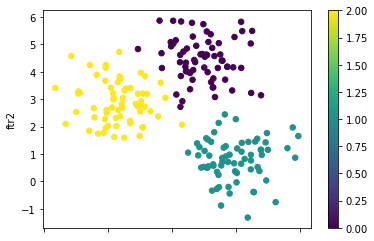

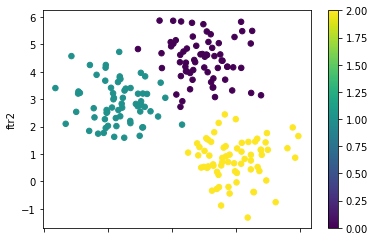

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
# clusterDF['target'] = y
# best_bandwidth = estimate_bandwidth(X, quantile=0.2)
# meanshift= MeanShift(bandwidth=round(best_bandwidth))
# cluster_labels = meanshift.fit_predict(X)
# clusterDF['meanshift_label']  = cluster_labels

unique_labels = np.unique(cluster_labels)
print(f'type(unique_labels) : {type(unique_labels), unique_labels}')
centers = meanshift.cluster_centers_
print(centers)
#fig, axes = plt.subplots(nrows=1, ncols=2)
clusterDF.plot(
                    kind='scatter',
                  x='ftr1',
                  y='ftr2',
                  s=30,
                  c=clusterDF.target,  #'scatter' and 'hexbin'
                  colormap='viridis')
clusterDF.plot(
                    kind='scatter',
                  x='ftr1',
                  y='ftr2',
                  s=30,
                  c=clusterDF.meanshift_label, 
                  colormap='viridis')
plt.show()

## target, meanshift_label에 대해 label별 시각화

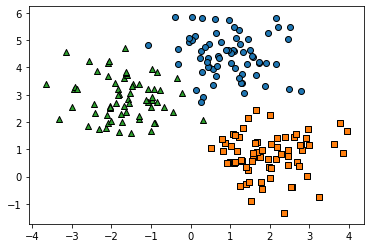

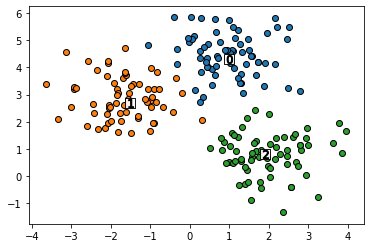

In [14]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

# clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
# clusterDF['target'] = y
# best_bandwidth = estimate_bandwidth(X, quantile=0.2)
# meanshift= MeanShift(bandwidth=round(best_bandwidth))
# cluster_labels = meanshift.fit_predict(X)
# clusterDF['meanshift_label']  = cluster_labels
# unique_labels = np.unique(cluster_labels)
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker='o')

    plt.scatter(x=center_x_y[0],y=center_x_y[1], s=100, color='white',
                    alpha=0.9, edgecolor='k', marker='s')
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
plt.show()

In [ ]:
# 판다스 subplot

# # dataframe sample data
# df1 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
# df2 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
# df3 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
# df4 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
# df5 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
# df6 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
# #define number of rows and columns for subplots
# nrow=3
# ncol=2
# # make a list of all dataframes 
# df_list = [df1 ,df2, df3, df4, df5, df6]
# fig, axes = plt.subplots(nrow, ncol)
# # plot counter
# count=0
# for r in range(nrow):
#     for c in range(ncol):
#         df_list[count].plot(ax=axes[r,c])
#         count=+1
        

# df.plot(subplots=True, layout=(1,2))
# fig, axes = plt.subplots(nrows=2, ncols=2)
# df1.plot(ax=axes[0,0])
# df2.plot(ax=axes[0,1])


# # Generate random data
# df = pd.DataFrame(np.random.randn(96,12),
#                   columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
#                            'K', 'L'])
# # Plotting ()scatter_matrix
# df.plot(kind='line', subplots=True, grid=True, title="Sample Data (Unit)",
#         layout=(4, 3), sharex=True, sharey=False, legend=True,    
#         style=['r', 'r', 'r', 'g', 'g', 'g', 'b', 'b', 'b', 'r', 'r', 'r'],
#         xticks=np.arange(0, len(df), 16))

ts = Series(randn(1000), index=date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()
    
plt.figure(); ts.plot(style='k--', label='Series'); plt.legend()



df = DataFrame(randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

df.plot(subplots=True, figsize=(6, 6)); plt.legend(loc='best')

plt.figure()
df.A.plot() #x_compat=True
df.B.plot(secondary_y=True, style='g')

plt.figure()
ax = df.plot(secondary_y=['A', 'B']) # mark_right=False
ax.set_ylabel('CD scale')
ax.right_ax.set_ylabel('AB scale')

plt.figure()
with pd.plot_params.use('x_compat', True):
   df.A.plot(color='r')
   df.B.plot(color='g')
   df.C.plot(color='b')

fig, axes = plt.subplots(nrows=2, ncols=2)
df['A'].plot(ax=axes[0,0]); axes[0,0].set_title('A')
df['B'].plot(ax=axes[0,1]); axes[0,1].set_title('B')
df['C'].plot(ax=axes[1,0]); axes[1,0].set_title('C')
df['D'].plot(ax=axes[1,1]); axes[1,1].set_title('D')


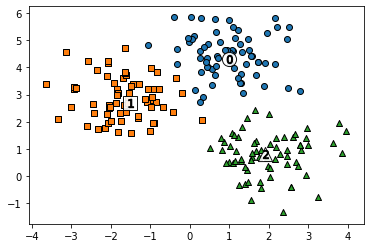

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
# clusterDF['target'] = y
# best_bandwidth = estimate_bandwidth(X, quantile=0.2)
# meanshift= MeanShift(bandwidth=round(best_bandwidth))
# cluster_labels = meanshift.fit_predict(X)
# clusterDF['meanshift_label']  = cluster_labels
# centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()
